<a href="https://colab.research.google.com/github/Andrii-Oliinyk-2726/Data_Science_HW6/blob/main/Hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [21]:
file_1_path = "/content/drive/MyDrive/Colab Notebooks/data/data_2d.csv"
file_2_path = "/content/drive/MyDrive/Colab Notebooks/data/mnist.csv"
data_2d = pd.read_csv(file_1_path)
mnist = pd.read_csv(file_2_path)
data_2d, mnist

(     0.000000000000000000e+00  -7.687164597386728637e-01  \
 0                         0.0                   2.687848   
 1                         0.0                  -0.201379   
 2                         0.0                   0.608496   
 3                         0.0                  -0.082282   
 4                         0.0                   2.083069   
 ..                        ...                        ...   
 194                       1.0                   0.629144   
 195                       1.0                  -0.723824   
 196                       1.0                   1.346107   
 197                       1.0                   3.608219   
 198                       1.0                   3.764228   
 
      4.608603078297135447e-01  
 0                    2.366961  
 1                    0.470430  
 2                    1.225400  
 3                    1.137218  
 4                    2.694482  
 ..                        ...  
 194                  4.378584  
 1

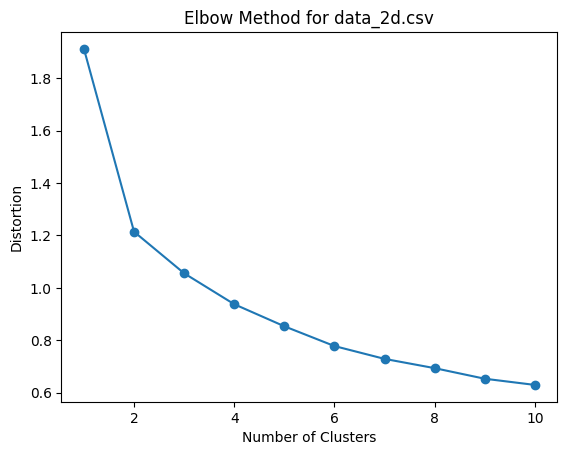

In [22]:
# Для data_2d.csv
X_data_2d = data_2d.values

distortions_data_2d = []
max_clusters_data_2d = 10

for k in range(1, max_clusters_data_2d + 1):
    kmeans_data_2d = KMeans(n_clusters=k, random_state=0)
    kmeans_data_2d.fit(X_data_2d)
    distortions_data_2d.append(sum(np.min(pairwise_distances(X_data_2d, kmeans_data_2d.cluster_centers_, metric='euclidean'), axis=1)) / X_data_2d.shape[0])

# Візуалізація ліктя для data_2d.csv
plt.plot(range(1, max_clusters_data_2d + 1), distortions_data_2d, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for data_2d.csv')
plt.show()

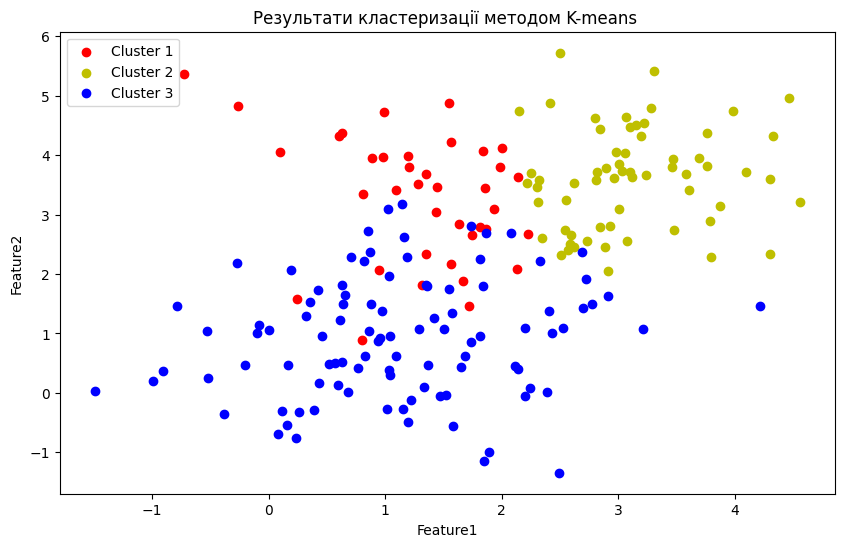

In [26]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)
kmeans.fit(data_scaled)

cluster_labels = kmeans.labels_

data_2d['Cluster'] = cluster_labels

colors = ['r', 'y', 'b']

# Створюємо графік і намалюємо точки для кожного кластеру
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = data_2d[data_2d['Cluster'] == cluster]
    plt.scatter(cluster_data.iloc[:, 1], cluster_data.iloc[:, 2], c=colors[cluster], label=f'Cluster {cluster + 1}')

plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Результати кластеризації методом K-means ')
plt.legend()
plt.show()

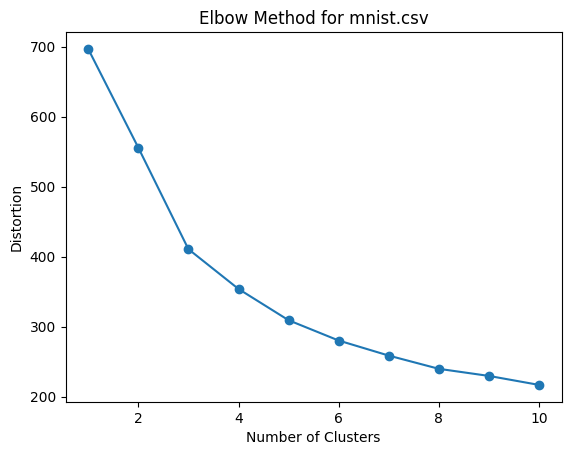

In [27]:
# Для mnist.csv
X_mnist = mnist.values

# Зменшення розмірності до 2D за допомогою PCA
pca = PCA(n_components=2)
X_mnist_pca = pca.fit_transform(X_mnist)

distortions_mnist = []
max_clusters_mnist = 10

for k in range(1, max_clusters_mnist + 1):
    kmeans_mnist = KMeans(n_clusters=k, random_state=42)
    kmeans_mnist.fit(X_mnist_pca)
    distortions_mnist.append(sum(np.min(pairwise_distances(X_mnist_pca, kmeans_mnist.cluster_centers_, metric='euclidean'), axis=1)) / X_mnist_pca.shape[0])

# Візуалізація ліктя для mnist.csv
plt.plot(range(1, max_clusters_mnist + 1), distortions_mnist, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for mnist.csv')
plt.show()

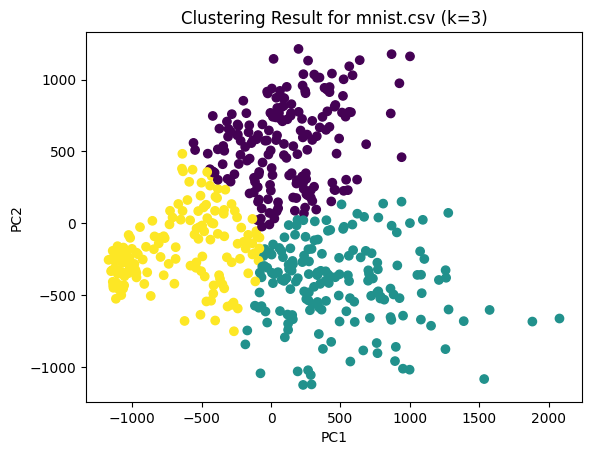

In [28]:
# Візуалізація результатів кластеризації mnist.csv (scatter plot)
# best_k = np.argmin(distortions_mnist) + 1
best_k = 3
kmeans_mnist = KMeans(n_clusters=best_k, random_state=42)
kmeans_mnist.fit(X_mnist_pca)
labels = kmeans_mnist.labels_

plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Clustering Result for mnist.csv (k={best_k})')
plt.show()